In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.preprocessing import StandardScaler

In [15]:

def svd_reconstruction(image_path, ks):
    # Load image
    original_image = Image.open(image_path)
    # Create a copy of the original image
    image_copy = original_image.copy()
    # Convert image copy to grayscale
    image_gray = image_copy.convert('L')

    image_array = np.array(image_gray)

    fig,ax = plt.subplots(2,2)

    fig.set_figheight(10)
    fig.set_figwidth(15)
    
    axs = ax.flatten()
    
    axs[0].imshow(np.array(image_copy), cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis("off")

    for i, k in enumerate(ks):
        
        U, S, VT = np.linalg.svd(image_array)

        U_k = U[:, :k]
        S_k = np.diag(S[:k])
        VT_k = VT[:k, :]

        reconstructed_image_array = np.dot(U_k, np.dot(S_k, VT_k))

        # Plot reconstructed image
        axs[i + 1].imshow(reconstructed_image_array, cmap='gray')
        axs[i + 1].set_title(f'k={k}')
        axs[i + 1].axis("off")
        
    plt.show()

# Usage
ks = [10, 50, 100]
ks = [100,50,10]
ks = [60,30,10]


image_path = './data/full_data/splitted_by_label/Boredom/img_000906_jpg.rf.a6676bb13b800da3a94d45218c85c386.jpg'


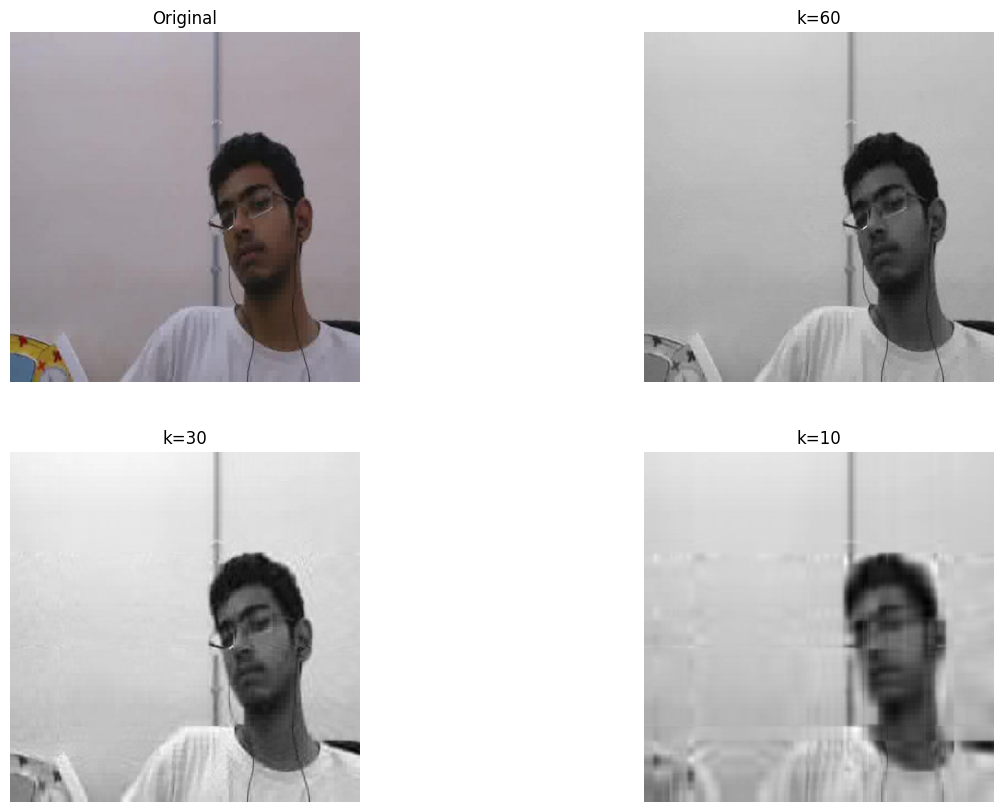

In [16]:
svd_reconstruction(image_path, ks)


In [4]:
from sklearn.decomposition import PCA

In [5]:
image = Image.open(image_path).copy()
image_gray = image.convert("L")
image_array = np.array(image_gray)

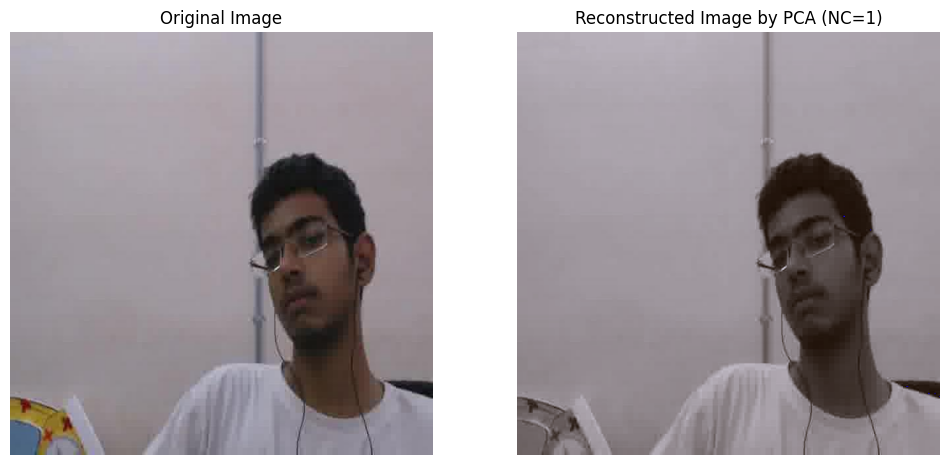

In [12]:
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.asarray(image)

# Reshape the image array to a 2D array
# where each row represents a pixel
X = image_array.reshape(-1, 3)  # For a color image with 3 channels (RGB)
# X = image_array.reshape(-1, 1)  # For a grayscale image

# Create a PCA instance
pca = PCA(n_components=1)

# Fit the PCA model to the image data
pca.fit(X)

# Project the image data onto the principal components
X_transformed = pca.transform(X)

# Reconstruct the image from the transformed data
X_reconstructed = pca.inverse_transform(X_transformed)
reconstructed_image = X_reconstructed.reshape(image_array.shape)

# Visualize the original and reconstructed images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image_array)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(reconstructed_image.astype(np.uint8))
ax2.set_title('Reconstructed Image by PCA (NC=1)')
ax2.axis('off')

plt.show()

In [7]:
pca.n_components

0.9

In [91]:
image_array_original = np.array(image)
image_array_norm = image_array_original/255

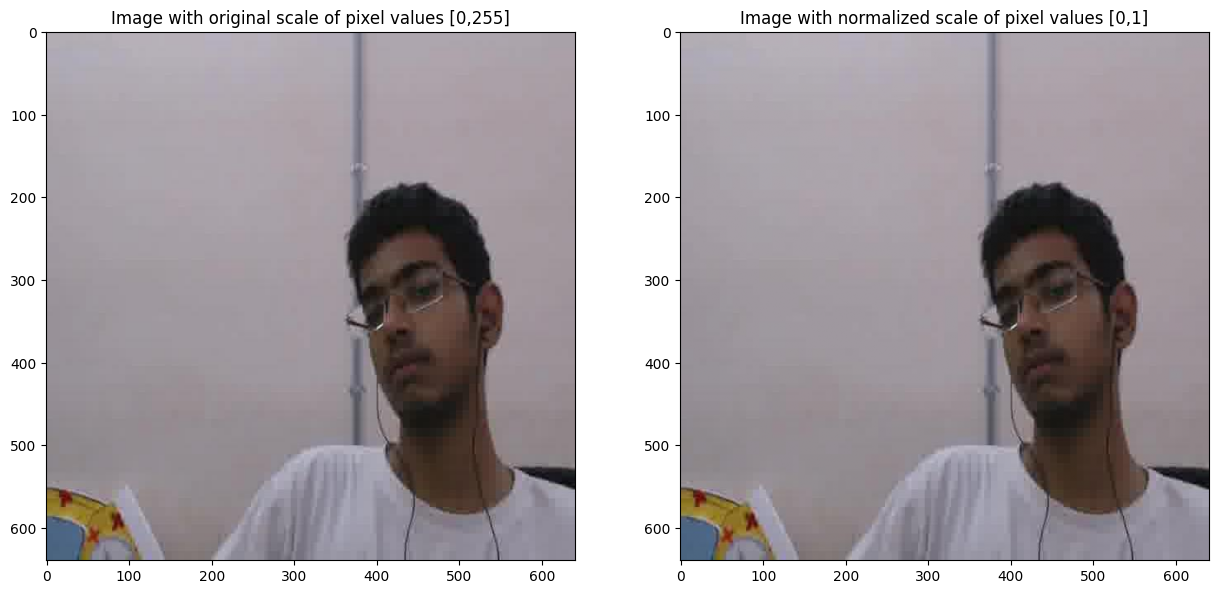

In [98]:
fig,ax = plt.subplots(1,2)

fig.set_figheight(10)
fig.set_figwidth(15)

ax[0].imshow(image_array_original)
ax[0].set_title("Image with original scale of pixel values [0,255]")
ax[1].imshow(image_array_norm)
ax[1].set_title("Image with normalized scale of pixel values [0,1]")

plt.show()

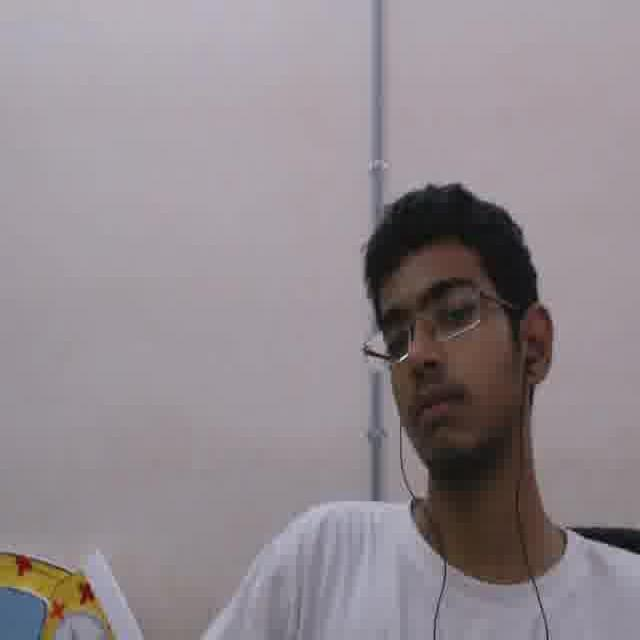